<a href="https://colab.research.google.com/github/wjyChina/DS5220_home_credit/blob/master/project_5220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import time
import numpy as np  #linear algebra
import pandas as pd #Only CSV IO
import os
import re
from torch.utils import data #dataloader of batch
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from torch.autograd import Variable #We can ask require grad or not
from torch.optim.optimizer import Optimizer
from torch.optim import lr_scheduler
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import gc

In [4]:
# !ls drive/My\ Drive
os.chdir("drive/My Drive/Colab Notebooks/5220") 
!ls

feature_selection.ipynb  test_after_selection.csv   train.csv
project_5220.ipynb	 test.csv
submit_ffnn.csv		 train_after_selection.csv


In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from keras.datasets import mnist
from keras.utils import np_utils
import torch.nn as nn

Using TensorFlow backend.


In [0]:
data=pd.read_csv('train.csv')

In [0]:
data.set_index(['Unnamed: 0'], inplace=True)

In [0]:
data.fillna(data.mean(), inplace=True)

In [46]:
data[data.isnull().values==True]

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,previous_app_CHANNEL_TYPE_Car dealer_mean,previous_app_CHANNEL_TYPE_Channel of corporate sales_mean,previous_app_CHANNEL_TYPE_Contact center_mean,previous_app_CHANNEL_TYPE_Country-wide_mean,previous_app_CHANNEL_TYPE_Credit and cash offices_mean,previous_app_CHANNEL_TYPE_Regional / Local_mean,previous_app_CHANNEL_TYPE_Stone_mean,previous_app_NAME_SELLER_INDUSTRY_Auto technology_mean,previous_app_NAME_SELLER_INDUSTRY_Clothing_mean,previous_app_NAME_SELLER_INDUSTRY_Connectivity_mean,previous_app_NAME_SELLER_INDUSTRY_Construction_mean,previous_app_NAME_SELLER_INDUSTRY_Consumer electronics_mean,previous_app_NAME_SELLER_INDUSTRY_Furniture_mean,previous_app_NAME_SELLER_INDUSTRY_Industry_mean,previous_app_NAME_SELLER_INDUSTRY_Jewelry_mean,previous_app_NAME_SELLER_INDUSTRY_MLM partners_mean,previous_app_NAME_SELLER_INDUSTRY_Tourism_mean,previous_app_NAME_SELLER_INDUSTRY_XNA_mean,previous_app_NAME_YIELD_GROUP_XNA_mean,previous_app_NAME_YIELD_GROUP_high_mean,previous_app_NAME_YIELD_GROUP_low_action_mean,previous_app_NAME_YIELD_GROUP_low_normal_mean,previous_app_NAME_YIELD_GROUP_middle_mean,previous_app_PRODUCT_COMBINATION_Card Street_mean,previous_app_PRODUCT_COMBINATION_Card X-Sell_mean,previous_app_PRODUCT_COMBINATION_Cash_mean,previous_app_PRODUCT_COMBINATION_Cash Street: high_mean,previous_app_PRODUCT_COMBINATION_Cash Street: low_mean,previous_app_PRODUCT_COMBINATION_Cash Street: middle_mean,previous_app_PRODUCT_COMBINATION_Cash X-Sell: high_mean,previous_app_PRODUCT_COMBINATION_Cash X-Sell: low_mean,previous_app_PRODUCT_COMBINATION_Cash X-Sell: middle_mean,previous_app_PRODUCT_COMBINATION_POS household with interest_mean,previous_app_PRODUCT_COMBINATION_POS household without interest_mean,previous_app_PRODUCT_COMBINATION_POS industry with interest_mean,previous_app_PRODUCT_COMBINATION_POS industry without interest_mean,previous_app_PRODUCT_COMBINATION_POS mobile with interest_mean,previous_app_PRODUCT_COMBINATION_POS mobile without interest_mean,previous_app_PRODUCT_COMBINATION_POS other with interest_mean,previous_app_PRODUCT_COMBINATION_POS others without interest_mean
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [39]:
data=data.drop(['SK_ID_CURR'],axis=1)
x_train=data.drop('TARGET',axis=1)
y_train=data['TARGET']
gc.enable()
del data
gc.collect()

4552

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.25,random_state=0)
mean=x_train.mean()
std=x_train.std()
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [0]:
x_train[np.isnan(x_train)]=-1
x_test[np.isnan(x_test)]=-1

In [19]:
from imblearn.over_sampling import SMOTE
def smote(X_train, y_train):
  smo = SMOTE(random_state=123)
  over_samples_X, over_samples_y = smo.fit_sample(X_train, y_train)
  return over_samples_X, over_samples_y

x_train,y_train=smote(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [14]:
print(x_train[:5,:10])

[[-7.70215299e-01 -6.45192953e-01 -8.11788789e-01 -2.11008389e-01
  -2.33555073e-03 -1.96998587e-04 -1.56819471e-04  3.95100716e-04
  -1.82620286e-03 -4.22432533e-04]
 [-6.43213929e-01 -3.36800535e-01 -2.03045080e-01 -3.62812499e-01
  -6.80589526e-02 -8.22036623e-02  7.90807402e+00 -3.36994651e-01
  -1.79887269e-01 -1.09378433e+00]
 [ 7.54111666e-01  2.07891960e+00  1.58666142e+00 -4.23371545e-02
  -6.80589526e-02 -8.22036623e-02 -3.14237384e-01  2.20477388e+00
  -1.79887269e-01  5.71466153e-02]
 [ 5.38613008e-01  1.18879988e+00  9.77917714e-01 -3.96546746e-01
  -6.80589526e-02 -8.22036623e-02 -3.14237384e-01  2.20477388e+00
  -1.79887269e-01  5.71466153e-02]
 [-1.40460112e+00 -1.15209212e+00 -1.09181089e+00 -4.23371545e-02
  -6.80589526e-02 -8.22036623e-02 -3.14237384e-01  9.33889614e-01
  -1.79887269e-01  6.32612087e-01]]


In [20]:
print((y_train==1).sum())
print((y_train==0).sum())

212042
212042


In [86]:
print((y_test==1).sum())
print((y_test==0).sum())

6240
70635


In [0]:
seed = 1
learning_rate = 0.001
batch_size = 1024
n_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
class MLP(torch.nn.Module):

  def __init__(self):
    super(MLP, self).__init__()
          
    self.linear_1 = nn.Linear(722, 526)
    self.linear_2 = nn.Linear(526, 258)
    self.linear_3 = nn.Linear(258,56)
    self.linear_out = nn.Linear(56, 1)
        
        
  def forward(self, x):
    out = self.linear_1(x)
    # print(out)
    out = torch.tanh(out)
    out = F.dropout(out,p=0.5,training=self.training)
    out = self.linear_2(out)
    out = torch.tanh(out) 
    out = F.dropout(out,p=0.5,training=self.training)
    out = self.linear_3(out)
    out = torch.sigmoid(out) 
    out = F.dropout(out,p=0.5,training=self.training)     
    logits = self.linear_out(out)
    # print(logits)
    return logits

In [0]:
def compute_epoch_loss(model, data_loader):
  curr_loss, num_examples = 0., 0
  loss_fn=nn.BCEWithLogitsLoss()
  with torch.no_grad():
    for features, targets in data_loader:
      features = features.view(-1, 722).to(device)
      targets = targets.to(device)
      logits = model.forward(features)
      loss = loss_fn(torch.squeeze(logits),targets)
      num_examples += targets.size()[0]
      curr_loss += loss*targets.size()[0]

    curr_loss = curr_loss / num_examples
    return curr_loss

    
def compute_accuracy(model, data_loader):
  correct_pred, num_examples = 0, 0
  l=0
  with torch.no_grad():
    for features, targets in data_loader:
      features = features.view(-1, 722).to(device)
      targets = targets.to(device)
      targets = torch.squeeze(targets)
      logits = model.forward(features)
      predicted_labels = torch.sigmoid(logits)
      num_examples += targets.size(0)
      predicted_labels = torch.squeeze(predicted_labels)
      correct_pred += (((np.array(predicted_labels.cpu())>0.5).astype(int) == np.array(targets.cpu())).sum())
    # print(correct_pred)
    return correct_pred/num_examples * 100

In [0]:
trainfoldx = torch.tensor(x_train, dtype=torch.float32).to(device)
trainfoldy = torch.tensor(y_train, dtype=torch.float32).to(device)
x_val_fold = torch.tensor(x_test, dtype=torch.float32).to(device)
y_val_fold = torch.tensor(y_test[:,np.newaxis], dtype=torch.float32).to(device)
# print(trainfoldy[trainfoldy==1].shape)
# print(trainfoldy[trainfoldy==0].shape)
# print(y_val_fold[y_val_fold==1].shape)
# print(y_val_fold[y_val_fold==0].shape)

train = torch.utils.data.TensorDataset(trainfoldx,trainfoldy)
valid = torch.utils.data.TensorDataset(x_val_fold, y_val_fold)

train_loader = torch.utils.data.DataLoader(train , batch_size=batch_size,shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

In [29]:
mbatch_cost = []
start_time = time.time()
minibatch_cost = []
torch.manual_seed(seed)
model = MLP()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001, weight_decay=1e-8)
loss_fn = torch.nn.BCEWithLogitsLoss()
for epoch in range(n_epochs):
    start = time.time()
    model.train()
    grand_loss = 0
    for  batch_idx, (x_batch, y_batch) in enumerate(train_loader):
        logits = model(x_batch)
        # prob=np.array(logits.detach().cpu())
        # print(prob[:10])
        loss=loss_fn(torch.squeeze(logits),y_batch)

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mbatch_cost.append(loss.item())
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Loss: %.4f' 
                %(epoch+1, n_epochs, batch_idx, len(train_loader), loss.item()))

                  #evaluation          
    model.eval()
    cost = compute_epoch_loss(model, train_loader)
    # cost_test = compute_epoch_loss(model, valid_loader)
    # epoch_cost.append(cost)

    train_accuracy = compute_accuracy(model, train_loader)
    valid_accuracy = compute_accuracy(model, valid_loader)

    print('Epoch: %03d/%03d Train Cost: %.4f' % (
            epoch+1, n_epochs, cost))
    print('Train Accuracy: %.3f | Test Accuracy: %.3f' % (train_accuracy, valid_accuracy))
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
    

Epoch: 001/010 | Batch 000/226 | Loss: 0.7460
Epoch: 001/010 | Batch 050/226 | Loss: 0.2784
Epoch: 001/010 | Batch 100/226 | Loss: 0.2715
Epoch: 001/010 | Batch 150/226 | Loss: 0.2592
Epoch: 001/010 | Batch 200/226 | Loss: 0.2308
Epoch: 001/010 Train Cost: 0.2467
Train Accuracy: 91.950 | Test Accuracy: 91.856
Time elapsed: 0.16 min
Epoch: 002/010 | Batch 000/226 | Loss: 0.2829
Epoch: 002/010 | Batch 050/226 | Loss: 0.2701
Epoch: 002/010 | Batch 100/226 | Loss: 0.2494
Epoch: 002/010 | Batch 150/226 | Loss: 0.2617
Epoch: 002/010 | Batch 200/226 | Loss: 0.2153
Epoch: 002/010 Train Cost: 0.2405
Train Accuracy: 92.015 | Test Accuracy: 91.880
Time elapsed: 0.31 min
Epoch: 003/010 | Batch 000/226 | Loss: 0.1962
Epoch: 003/010 | Batch 050/226 | Loss: 0.2396
Epoch: 003/010 | Batch 100/226 | Loss: 0.2194
Epoch: 003/010 | Batch 150/226 | Loss: 0.2274
Epoch: 003/010 | Batch 200/226 | Loss: 0.2524
Epoch: 003/010 Train Cost: 0.2386
Train Accuracy: 92.051 | Test Accuracy: 91.874
Time elapsed: 0.47 mi

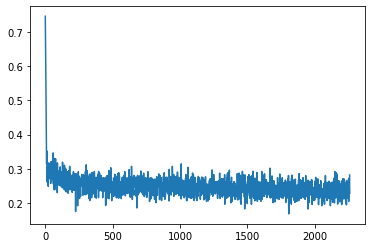

In [30]:
plt.plot(mbatch_cost)
# plt.ylim([0, 400])
plt.show()

In [0]:
logits = model(x_val_fold)

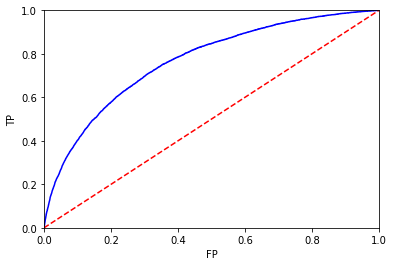

AUC= 0.766517595421025


In [32]:
predicted_prob = torch.sigmoid(logits)
# (np.array(predicted_labels.detach().cpu())>0.5).sum()
fpr, tpr, thresholds = metrics.roc_curve(y_test, np.array(predicted_prob.detach().cpu()))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TP')
plt.xlabel('FP')
plt.show()
AUC = metrics.auc(fpr, tpr)
print('AUC=',AUC)

In [0]:
submit=pd.read_csv('test.csv')

In [27]:
submit.columns

Index(['Unnamed: 0', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       ...
       'previous_app_PRODUCT_COMBINATION_Cash X-Sell: low_mean',
       'previous_app_PRODUCT_COMBINATION_Cash X-Sell: middle_mean',
       'previous_app_PRODUCT_COMBINATION_POS household with interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS household without interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS industry with interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS industry without interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS mobile with interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS mobile without interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS other with interest_mean',
       'previous_app_PRODUCT_COMBINATION_POS others without interest_m

In [0]:
test=submit.drop(['Unnamed: 0','SK_ID_CURR'],axis=1)

In [0]:
test=(test-mean)/std

In [0]:
test=np.array(test)
test[np.isnan(test)]=-1
test=torch.tensor(test, dtype=torch.float32).to(device)

In [0]:
logits = model(test)
predicted_prob = torch.sigmoid(logits)
predicted_prob = np.array(predicted_prob.detach().cpu())

In [97]:
predicted_prob[:5]

array([[0.05503048],
       [0.17696759],
       [0.06069572],
       [0.01991686],
       [0.09288452]], dtype=float32)

In [98]:
sub=pd.DataFrame({'SK_ID_CURR':submit['SK_ID_CURR']})
sub.shape

(48744, 1)

In [0]:
sub['TARGET'] = predicted_prob
sub.fillna(0.5, inplace=True)
sub.to_csv('submit_ffnn.csv', index=False)

In [102]:
sub[sub.isnull().values==True]

,SK_ID_CURR,TARGET
45222,431114,NaN
